<a href="https://colab.research.google.com/github/ayaan-27/NLP/blob/main/NLP_Assignment1_spam_clf_J023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk as nltk
import numpy as np
import pandas as pd

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [6]:
data_frame=pd.read_csv(r"/content/spam.csv",encoding="ISO-8859-1")

In [7]:
data_frame

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
data_frame.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
columns=[2,3,4]
data_frame=data_frame.drop(data_frame.columns[columns],axis=1)

In [12]:
data_frame=data_frame.rename({'v1':'y','v2':'x'},axis=1)

In [13]:
data_frame

,y,x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


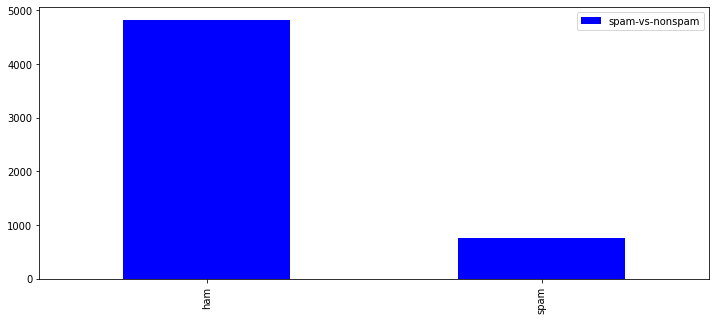

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
data_frame['y'].value_counts().plot(kind='bar',color='blue',label='spam-vs-nonspam')
plt.legend()
plt.show()

In [19]:
from string import punctuation
from nltk.corpus import stopwords
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
corpus = data_frame['x'].tolist()
len(corpus)

5572

In [20]:
#final_corpus
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)

In [21]:
x=data_frame['x']
y=data_frame['y']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_frame['x'])
x = vector.toarray()
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model1 = MultinomialNB()
model1.fit(x_train,y_train)
ypred = model1.predict(x_train)
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

0.9699349338119811
[[3876    0]
 [ 134  447]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3876
        spam       1.00      0.77      0.87       581

    accuracy                           0.97      4457
   macro avg       0.98      0.88      0.93      4457
weighted avg       0.97      0.97      0.97      4457



In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model2 = xgb.XGBClassifier()
model2.fit(x_train, y_train)  
y_pred = model2.predict(x_train)
print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

0.980480143594346
[[3871    5]
 [  82  499]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      3876
        spam       0.99      0.86      0.92       581

    accuracy                           0.98      4457
   macro avg       0.98      0.93      0.95      4457
weighted avg       0.98      0.98      0.98      4457



In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model3 = LinearSVC().fit(x_train,y_train)
y_pred = model3.predict(x_train)
print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

0.9995512676688355
[[3876    0]
 [   2  579]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3876
        spam       1.00      1.00      1.00       581

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

